Dataset head:
   label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
✅ Accuracy: 0.9883408071748879

Confusion Matrix:
 [[966   0]
 [ 13 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



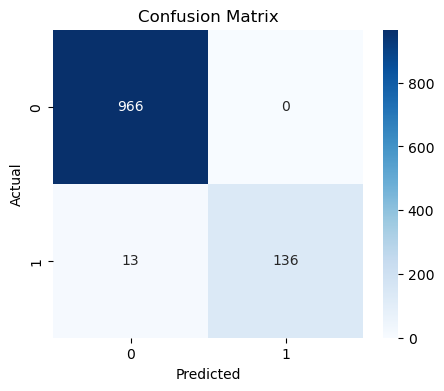


Test Messages Predictions:
Congratulations! You won a free ticket -> Ham
Hey, are we meeting today? -> Ham
Claim your $1000 prize now -> Ham
Don't forget to submit the assignment -> Ham


In [10]:
# Spam email detection ------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# 1️ Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])   # tab separator
print("Dataset head:\n", df.head())

# 2️ Encode target (ham=1, spam=0)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})   # ham=0 spam=1

# 3️ Features (text) and Target (label)
X = df['text']
y = df['label_num']

# 4️ Convert Text to Numerical Features (Bag-of-Words)
vectorizer = CountVectorizer()
X_vector = vectorizer.fit_transform(X)

# 5️ Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_vector, y, test_size=0.2, random_state=42)

# 6️ Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 7️ Make Predictions
y_pred = model.predict(X_test)

# 8️ Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9️ Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 10 Test New Messages
messages = [
    "Congratulations! You won a free ticket",
    "Hey, are we meeting today?",
    "Claim your $1000 prize now",
    "Don't forget to submit the assignment"
]

messages_vector = vectorizer.transform(messages)
predictions = model.predict(messages_vector)

print("\nTest Messages Predictions:")
for msg, pred in zip(messages, predictions):
    print(f"{msg} -> {'Spam' if pred==1 else 'Ham'}")
